In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import pandas as pd


In [ ]:
# Exibe todos os datasets disponíveis
# tfds.list_builders()

In [2]:
(img_train, label_train), (img_test, label_test) = tfds.as_numpy(tfds.load(
    name = 'kmnist',
    split=['train', 'test'],
    batch_size=-1,
    as_supervised=True,
))

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/kmnist/3.0.1.incompleteXD7MTV/kmnist-train.tfrecord*...:   0%|          | 0/60…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/kmnist/3.0.1.incompleteXD7MTV/kmnist-test.tfrecord*...:   0%|          | 0/100…

Dataset kmnist downloaded and prepared to ~/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [11]:
class_names = ['9 (wo)', '1 (ki)', '7 (ya)', '2 (su)', '1 (ki)',
               '2 (su)', '1 (ki)', '8 (re)', '8 (re)', '6 (ma)']

In [3]:
img_train = img_train.squeeze()
img_test = img_test.squeeze()

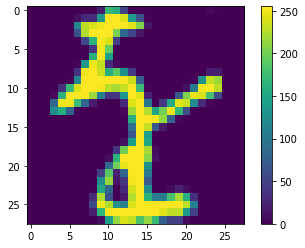

In [4]:
plt.figure()
plt.imshow(img_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
img_train = img_train / 255.0

img_test = img_test / 255.0

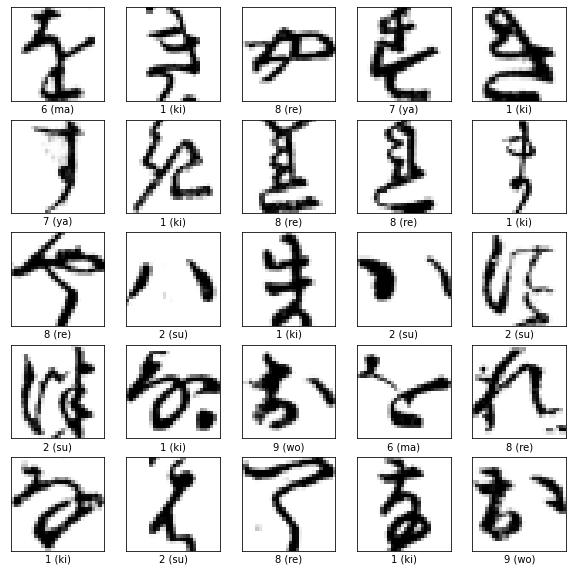

In [22]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[label_train[i]])
plt.show()

In [17]:
label_train

array([9, 1, 7, ..., 2, 5, 6])

In [13]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(img_train, label_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4058 - accuracy: 0.8798
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1988 - accuracy: 0.9417
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1373 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1045 - accuracy: 0.9697
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0799 - accuracy: 0.9767
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0616 - accuracy: 0.9821
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0499 - accuracy: 0.9856
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0379 - accuracy: 0.9890
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0313 - accuracy: 0.9911
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.026

In [ ]:
test_loss, test_acc = model.evaluate(img_test,  label_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.5109 - accuracy: 0.8946 - 412ms/epoch - 1ms/step

Test accuracy: 0.894599974155426
